Import necessary libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

Load the IPL matches dataset

In [33]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [34]:
matches.shape

(950, 20)

In [35]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [36]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [37]:
matches[matches['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


Let's eliminate these matches from the data since they aren't relevant and were stopped by rain or other factors.

In [38]:
matches.drop(['City','ID','method'], axis=1, inplace=True)
matches = matches.dropna()

In [39]:
matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [40]:
matches[matches['Season']=='2020/21'].head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,2020-11-08,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi
136,2020-11-06,2020/21,Eliminator,Royal Challengers Bangalore,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,6.0,KS Williamson,"['V Kohli', 'D Padikkal', 'AJ Finch', 'AB de V...","['DA Warner', 'SP Goswami', 'MK Pandey', 'KS W...",PR Reiffel,S Ravi
137,2020-11-05,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
138,2020-11-03,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth


In [41]:
# Make the appropriate data type conversions for the Date columns.
matches['Date'] = pd.to_datetime(matches['Date'])

In [42]:
matches['SEASON_INT'] = matches['Season'].apply(lambda x : int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x : ('20'+str(x[5:])) if len(x) > 5 else int(x[:4]))

In [43]:
matches.drop('Season', axis=1, inplace=True)

In [44]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [45]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [46]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [47]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


After the Match Dataframe has been cleaned, let's examine the Ball by Ball Dataframe and create a Statistical Dataframe from it so that we can create a Dashbaord or do a visualisation.

In [48]:
balls = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [49]:
balls.shape

(225954, 17)

In [50]:
balls.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [51]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

Creatinhg Batsman Statistics

In [52]:
batgroup = balls.groupby(['batter'])

batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})

batsman_Stats['innings']=batgroup['innings'].nunique()

batsman_Stats['runs']=batgroup['batsman_run'].sum()

batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)

batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats['player_out']=batgroup['player_out'].count()

batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)

batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)

batsman_Stats

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0.00
Yashpal Singh,67,2,47,39.0,20.0,2.0,1.0,5.0,0.0,4,11.75,70.15
Younis Khan,7,1,3,4.0,3.0,0.0,0.0,0.0,0.0,1,3.00,42.86


In [53]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [54]:
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]

Creatinhg Bowler Statistics

In [55]:
bowlgroup = balls.groupby(['bowler'])

bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN
...,...,...
YK Pathan,1184,42.0
YS Chahal,2940,166.0
Yash Dayal,205,11.0


In [56]:
bowler_Stats['wickets'].fillna(0,inplace=True)
bowler_Stats

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,0.0
...,...,...
YK Pathan,1184,42.0
YS Chahal,2940,166.0
Yash Dayal,205,11.0


In [57]:
 # Total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats

,BallsThrow,wickets,overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,12,2.0,2.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0
...,...,...,...
YK Pathan,1184,42.0,197.0
YS Chahal,2940,166.0,490.0
Yash Dayal,205,11.0,34.0


In [58]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)

bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)

bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)

bowler_Stats

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf
...,...,...,...,...,...,...
YK Pathan,1184,42.0,197.0,1415.0,7.18,28.19
YS Chahal,2940,166.0,490.0,3624.0,7.40,17.71
Yash Dayal,205,11.0,34.0,296.0,8.71,18.64


In [62]:
# Initialize an empty dictionary to store players and their corresponding match IDs
players_matches_dict = {}

# Iterate over each row in the balls dataset
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}
    
    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a new DataFrame 'final_players_matches' with a column 'Players' containing the keys (player names) from the 'players_matches_dict' dictionary
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
# Add a new column 'matches' to the 'final_players_matches' DataFrame, which contains the count of match IDs for each player
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
# Set the index of the 'final_players_matches' DataFrame to the 'Players' column
final_players_matches = final_players_matches.set_index('Players')

final_players_matches

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134
...,...
D Kalyankrishna,3
SB Joshi,4
MA Khote,3


In [63]:
# Catches Caught by Players
OutByCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
JustCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(OutByCatch, JustCatch, left_index=True, right_index=True, how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches', 'fielder_catches'], axis=1, inplace=True)

catchDf

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0
...,...
Yash Dayal,1.0
Yashpal Singh,3.0
Younis Khan,1.0
Yuvraj Singh,31.0


In [64]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,...,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,...,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


To find out which player is consistently good from 2008 to 2022, let's do some data visualisation.

In [68]:
# Make a bar graph to display the total number of runs scored by each player and the Player of the Match award.
fig = px.bar(final_df, x='Player_of_Match', y='runs', title='Number of runs scored by different players and they get Player of Match', hover_name=final_df.index, color='runs')
fig.show()

In [69]:
# Make a bar plot to display the number of wickets that each player has taken and their Player of the Match ranking.
fig = px.bar(final_df, x='Player_of_Match', y='wickets', title='Number of Wickets taken by different players and they get Player of Match', hover_name=final_df.index, color='wickets')
fig.show()

In [70]:
# To determine which player was the Most Player of the Match, create a scatter plot.
fig = px.scatter(final_df, x='matches', y='Player_of_Match', color='Player_of_Match',
                 size='Player_of_Match', hover_name=final_df.index, title='Player of the Match')
fig.update_layout(coloraxis=dict(colorscale='reds'))
fig.show()

In [71]:
# To determine which player has the best strike rate, create a scatter plot.
fig = px.scatter(final_df, x='matches', y='bat_strike', color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))

fig.show()

In [72]:
# Make a scatter plot to determine which player caught the most Catches.
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

fig.show()

In [73]:
# Make a scatter plot to view the players' bowling economies.
fig = px.scatter(final_df, x='matches', y='bowl_econ', color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))

fig.show()

In [74]:
# Make a scatter plot to determine which batsman has the most sixes.
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

fig.show()

In [75]:
# Make a scatter plot to determine which batsman has the most fours.
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

fig.show()

As we look at the top players in the IPL thus far, let's take a look at the players who lose out on chances and score zeros to balls they face or are out the majority of the time in the IPL.

In [76]:
# Make a scatter plot to determine which balls a batsman faced with the greatest number of zeros.
fig = px.scatter(final_df, x='matches', y='0s', color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

fig.show()

In [77]:
# Determine the ratio of player_out to matches.
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Make a scatter plot to determine which batsman has had the most time outs.
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

fig.show()

Let's visualise the top 10 batters, bowlers, strike rate, and best team after learning about the players' best and worst performances.

In [78]:
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,...,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match,not_out
A Mishra,154.0,410.0,2.0,362.0,182.0,172.0,22.0,0.0,29.0,5.0,...,88.29,3317.0,166.0,553.0,3976.0,7.19,19.98,21.0,12.0,124.0
A Nehra,88.0,63.0,2.0,41.0,37.0,21.0,1.0,0.0,3.0,1.0,...,65.08,1974.0,106.0,329.0,2495.0,7.58,18.62,19.0,6.0,80.0
AB Dinda,76.0,50.0,2.0,26.0,31.0,16.0,1.0,0.0,2.0,0.0,...,52.00,1589.0,69.0,265.0,2073.0,7.82,23.03,7.0,2.0,67.0
AB de Villiers,170.0,3487.0,4.0,5181.0,1115.0,1420.0,268.0,17.0,414.0,253.0,...,148.58,0.0,0.0,0.0,0.0,0.00,0.00,120.0,24.0,45.0
AC Gilchrist,80.0,1555.0,2.0,2069.0,737.0,417.0,66.0,4.0,239.0,92.0,...,133.05,1.0,1.0,0.0,0.0,0.00,1.00,51.0,7.0,4.0


In [79]:
# Choose the top 10 by sorting the dataframe based on batting average.
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)

fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

In [80]:
# To determine the top 10, sort the dataframe by batting average.
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)

fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [81]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [82]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [83]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [85]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

In [86]:
# Chart the most successful squad for every year.
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

Let's use K-Means Clustering to identify the Greatest Players of All Time.

<Axes: >

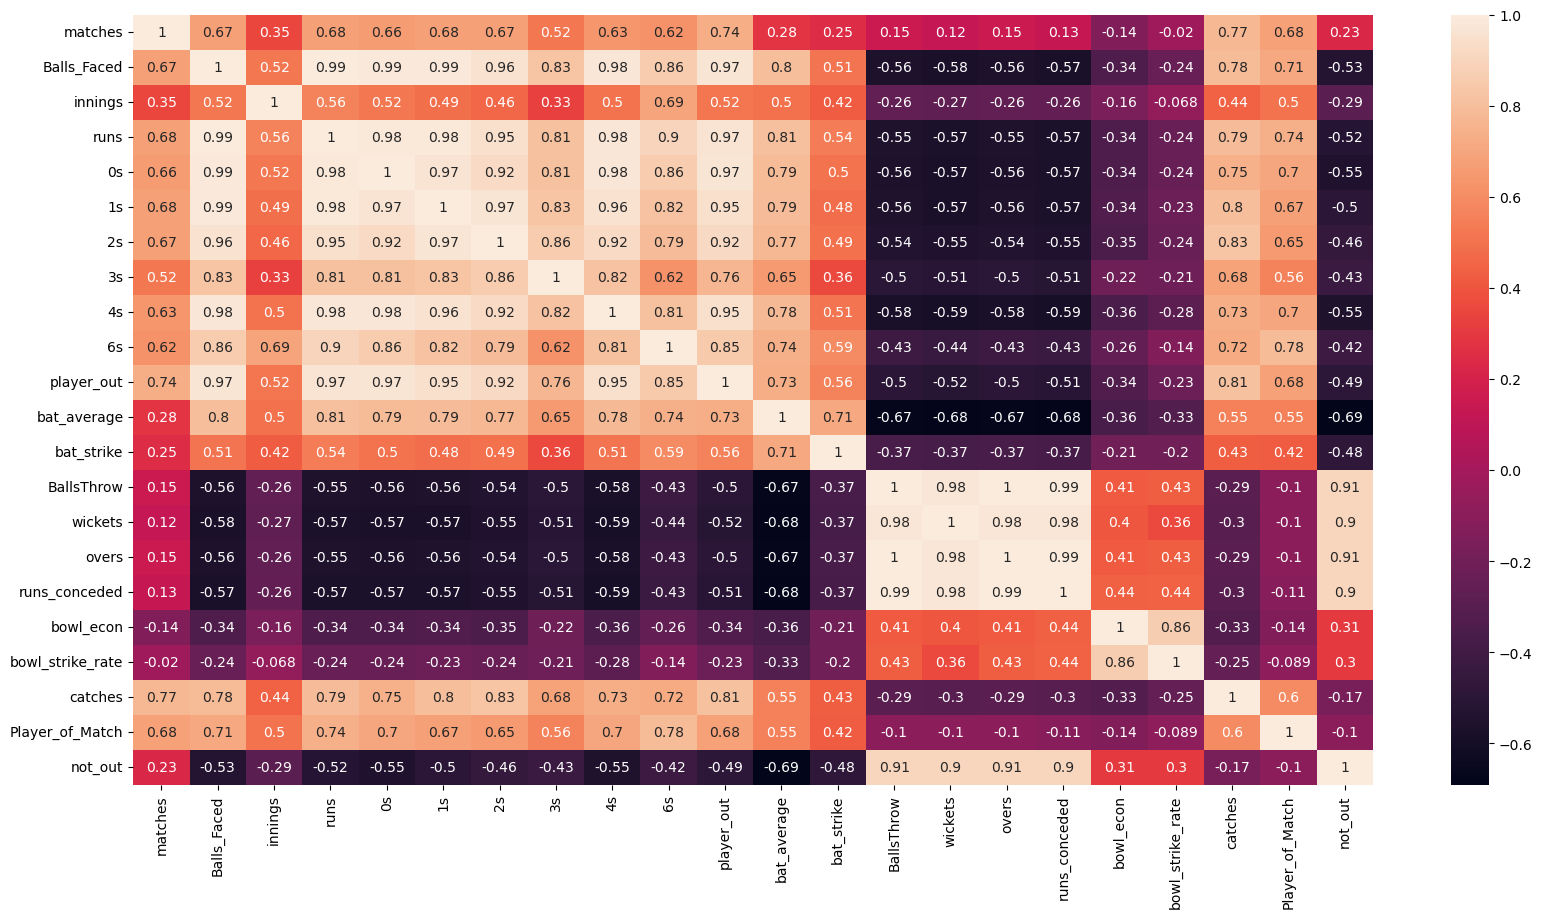

In [87]:
# Remove the Columns That Are Most Correlated.
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [88]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [89]:
corr_cols = correlation(final_df,0.85)
corr_cols

['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out']

In [90]:
top_columns = final_df.drop(['runs',
                             '0s',
                             '1s',
                             '2s',
                             '3s',
                             '4s',
                             '6s',
                             'player_out',
                             'wickets',
                             'overs',
                             'runs_conceded',
                             'bowl_strike_rate',
                             'not_out'], axis=1)

In [91]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,21.0,12.0
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,19.0,6.0
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,7.0,2.0
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,120.0,24.0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,7.0


In [92]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(final_df_new),
                           columns=top_columns.columns,
                           index=final_df_new.index)
scaled_data.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match
A Mishra,1.284238,-0.698228,-0.509563,-0.865744,-1.059655,2.127278,0.310825,-0.588725,1.429841
A Nehra,-0.292123,-0.986563,-0.509563,-1.530885,-2.001902,0.859354,0.417325,-0.663943,0.128469
AB Dinda,-0.578734,-0.997365,-0.509563,-1.744305,-2.532906,0.495876,0.482864,-1.115251,-0.739113
AB de Villiers,1.666387,1.858559,2.571516,1.946034,1.387913,-1.004295,-1.652602,3.134565,4.032587
AC Gilchrist,-0.483197,0.253192,-0.509563,0.584169,0.757448,-1.003351,-1.652602,0.539544,0.345364


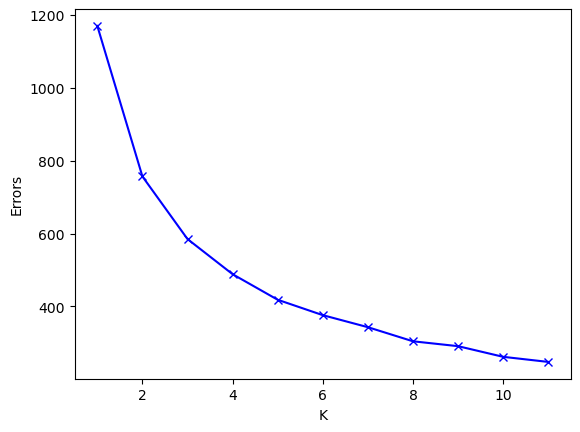

In [93]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters, errors, 'bx-')

In [94]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

final_df_new

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match,cluster
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,21.0,12.0,2
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,19.0,6.0,2
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,7.0,2.0,2
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,120.0,24.0,0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...
Y Venugopal Rao,57.0,865.0,2.0,23.45,113.87,222.0,9.11,13.0,0.0,1
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,43.0,15.0,0
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,24.0,6.0,2
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,31.0,5.0,1


In [95]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index' : 'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames', 'cluster']])

topPlayers_cluster

,PlayerNames,cluster
0,A Mishra,2
1,A Nehra,2
2,AB Dinda,2
3,AB de Villiers,0
4,AC Gilchrist,3
...,...,...
125,Y Venugopal Rao,1
126,YK Pathan,0
127,YS Chahal,2
128,Yuvraj Singh,1


In [96]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [97]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

TopPlayer_Dataset

,teams1,teams2,teams3,teams4
0,AB de Villiers,AD Russell,A Mishra,AC Gilchrist
1,AM Rahane,AJ Finch,A Nehra,AT Rayudu
2,CH Gayle,AM Nayar,AB Dinda,BB McCullum
3,HH Pandya,BJ Hodge,AR Patel,DA Miller
4,KA Pollard,CH Morris,B Kumar,DPMD Jayawardene
5,KD Karthik,DJ Hooda,DJ Bravo,EJG Morgan
6,MS Dhoni,DJ Hussey,DL Chahar,G Gambhir
7,RA Jadeja,DR Smith,DS Kulkarni,Ishan Kishan
8,RG Sharma,F du Plessis,DW Steyn,JC Buttler
9,RV Uthappa,GJ Maxwell,HV Patel,KC Sangakkara


These are the Top 4 Player Clusters from 2008 to 2022, Selected by Player Performance and Attributes.

Now let's construct the successful prediction model.

In [98]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
balls = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')

In [99]:
inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings'] == 1]
inningScores

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [100]:
inningScores['target'] = inningScores['total_run'] + 1
inningScores

,ID,innings,total_run,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
...,...,...,...,...
1918,1304116,1,157,158
1920,1312197,1,188,189
1922,1312198,1,207,208
1924,1312199,1,157,158


In [101]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

In [102]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [103]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [104]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [105]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [106]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [107]:
matches = matches[['ID','City','Team1','Team2','WinningTeam','target']].dropna()
matches.head()

,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158


In [108]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [109]:
balls = balls[balls['BattingTeam'].isin(teams2023)]
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [110]:
final = matches.merge(balls, on='ID')
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [111]:
final = final[final['innings']==2]
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [112]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [113]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130


In [114]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115


In [115]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10


In [116]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [117]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [118]:
final['result'] = final.apply(result, axis=1)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1


In [119]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1,Rajasthan Royals


In [120]:
winningPred = final[['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target', 'result']]
winningPred.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131,1


In [121]:
winningPred.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
38829,Punjab Kings,Chennai Super Kings,Chandigarh,20,29,7,9.956044,4.137931,171,1


In [122]:
trf = ColumnTransformer([('trf', OneHotEncoder(sparse=False, drop='first'),['BattingTeam', 'BowlingTeam', 'City'])], 
                        remainder = 'passthrough')

In [123]:
X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [125]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [126]:
pipe.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.88, 0.12],
       [0.14, 0.86]])

In [127]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
           'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l, columns=columns)

In [128]:
pipe.predict_proba(team2023)

array([[0.43, 0.57]])